In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("diamonds")
ds = df.select_dtypes(include = [("float"), ("int")])
df = df.dropna()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_table = df.table

In [4]:
df.table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

<Axes: xlabel='table'>

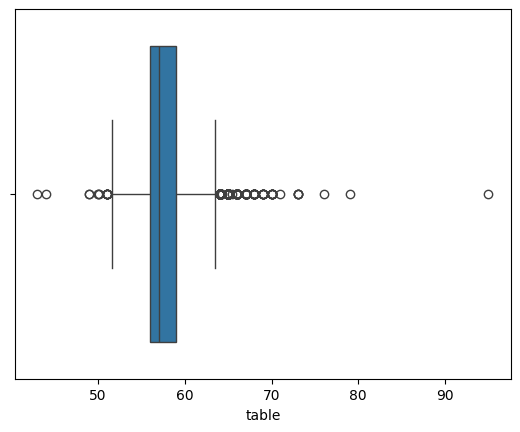

In [5]:
sns.boxplot(x = df.table)

In [6]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

In [7]:
IQR

3.0

In [8]:
sub_bound = Q1 - 1.5 * IQR
top_bound = Q3 + 1.5 * IQR

In [9]:
sub_bound

51.5

In [10]:
top_bound

63.5

In [11]:
(df_table < sub_bound) | (df_table > top_bound)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [12]:
df_table < sub_bound

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [13]:
contrary_tf = df_table < sub_bound

In [14]:
contrary_tf

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [15]:
df[contrary_tf]

,carat,cut,color,clarity,depth,table,price,x,y,z
1515,0.91,Fair,F,SI2,65.3,51.0,2996,6.05,5.98,3.93
3238,0.94,Fair,H,SI2,66.0,50.1,3353,6.13,6.17,4.06
3979,1.00,Premium,H,SI1,62.2,51.0,3511,6.47,6.40,4.00
4150,0.91,Premium,F,SI2,61.0,51.0,3546,6.24,6.21,3.80
5979,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
7418,1.02,Fair,F,SI1,61.8,50.0,4227,6.59,6.51,4.05
8853,1.00,Fair,E,VS2,66.4,51.0,4480,6.31,6.22,4.16
11368,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
22701,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
25179,2.00,Fair,H,SI1,61.2,50.0,13764,8.17,8.08,4.97


In [16]:
df[contrary_tf].index

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')

## Deleting

In [17]:
import pandas as pd

In [18]:
df_table = pd.DataFrame(df_table)

In [19]:
df_table

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [20]:
df_table.shape

(53940, 1)

In [21]:
t_df = df_table[~((df_table < sub_bound) | (df_table > top_bound)).any(axis = 1)]

In [22]:
t_df.shape

(53335, 1)

## Filling with Centering

In [23]:
df = sns.load_dataset("diamonds")
ds = df.select_dtypes(include = [("float"), ("int")])
df = df.dropna()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
df_table[contrary_tf]

,table
1515,51.0
3238,50.1
3979,51.0
4150,51.0
5979,49.0
7418,50.0
8853,51.0
11368,43.0
22701,49.0
25179,50.0


In [25]:
df_table.mean()

table    57.457184
dtype: float64

In [26]:
df_table[contrary_tf] = df_table.mean()

In [27]:
df_table[contrary_tf]

,table
1515,57.457184
3238,57.457184
3979,57.457184
4150,57.457184
5979,57.457184
7418,57.457184
8853,57.457184
11368,57.457184
22701,57.457184
25179,57.457184


## Suppression Method

In [28]:
df = sns.load_dataset("diamonds")
ds = df.select_dtypes(include = ["float64", "int64"])
df = df.dropna()
df.head()
df_table = df["table"]

In [29]:
df_table[contrary_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [30]:
df_table[contrary_tf] = sub_bound

C:\Users\emresimsek\AppData\Local\Temp\ipykernel_21912\998167444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[contrary_tf] = sub_bound


In [31]:
df_table[contrary_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

# Local Outlier Factor

In [34]:
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(include = ["float64", "int64"])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [38]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [37]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [39]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [40]:
df_scores = clf.negative_outlier_factor_

In [41]:
df_scores[0: 10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [45]:
np.sort(df_scores)[0: 20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [61]:
threshold_value = np.sort(df_scores)[13]

In [53]:
contrary_tf = df_scores > threshold_value

In [54]:
contrary_tf

array([ True,  True,  True, ...,  True,  True,  True])

## Deleting method

In [55]:
new_df  = df[df_scores > threshold_value]

In [56]:
new_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [59]:
#  outliers
df[df_scores < threshold_value]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [64]:
df[df_scores == threshold_value]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [65]:
supression_value = df[df_scores == threshold_value]

In [67]:
outliers = df[~contrary_tf]

In [72]:
outliers

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [69]:
res = outliers.to_records(index = False)

In [70]:
res[:] = supression_value.to_records(index = False)

In [71]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [73]:
df[~contrary_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [74]:
df[~contrary_tf] = pd.DataFrame(res, index = df[~contrary_tf].index)

In [75]:
df[~contrary_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
